# Apoplexy Disease Prediction Model


To Determine whether a person has Apoplexy based on the dataset.

## 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

## 2. Importing the dataset 

In [ ]:
dataset=pd.read_csv('DiseasePrediction.csv')
#Displaying top 5 rows of dataset
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


## 3. Data cleaning or Exploratory Data Analysis(EDA)
Checking for quality of the dataset, missing values and removing the unwanted columns which are not required for training.

In [ ]:
no_of_rows,no_of_columns = dataset.shape
print('Total Rows:',no_of_rows,'\nTotal Columns:',no_of_columns,'\n')

#Showing information about dataset
dataset.info()

#Checking for missing data
dataset.isna().sum()

Total Rows: 5110 
Total Columns: 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  apoplexy           5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
apoplexy               0
dtype: int64

### Countplot 
Countplot for checking how each column effecting the chance of getting Apoplexy.

In [ ]:
#Plottting parameters and apoplexy with percentage.
def Count_plot(column):
    plt.figure(figsize=(6,4))
    total = float(len(dataset))
    ax = sns.countplot(x=column, hue="apoplexy", data=dataset)
    plt.title(f'Effect of {column} on Apoplexy', fontsize=14)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

#### Id column

In [ ]:
#Checking for uniques values in Id column
print('Unique columns in ID:',dataset.id.nunique())

#Since all values are unique and Id column is just only for identification. So, we are dropping the column.
dataset=dataset.drop(columns='id')
dataset.head(3)

Unique columns in ID: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes


#### Gender

No of persons per each Gender
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


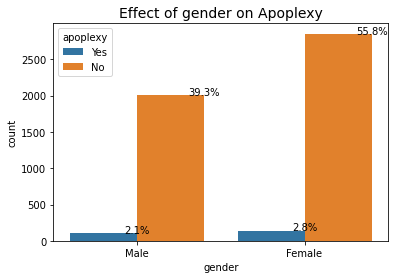

In [ ]:
# Count of values
print('No of persons per each Gender\n',dataset['gender'].value_counts())

#Deleting the single data with gender 'Other'.
dataset.drop(dataset[dataset.gender == 'Other'].index, inplace = True)
#Checking whether Gender effecting the chance of getting apoplexy using Countplot
Count_plot('gender')

#from below plot we could say gender is not effecting apoplexy much..

#### Age

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


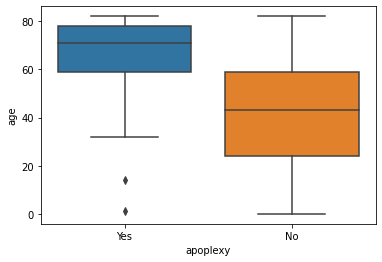

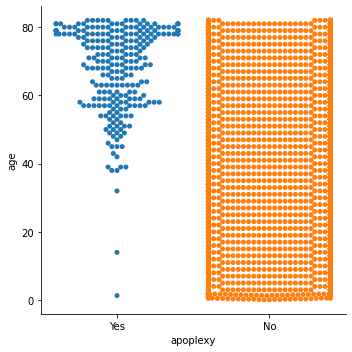

In [ ]:
#Checking whether Age effects apoplexy
sns.boxplot(data=dataset, x='apoplexy', y='age')
sns.catplot(data=dataset, kind = "swarm", x="apoplexy", y="age")
#from plot we can say Age effecting apoplexy and for persons age above 60 have high chance of getting apoplexy.

#### Hypertension

Hypertension
 No     4611
Yes     498
Name: hypertension, dtype: int64


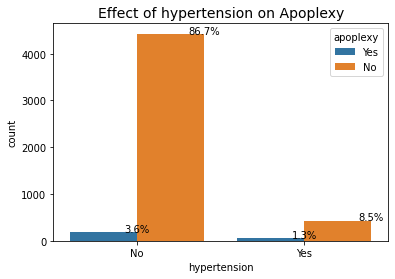

In [ ]:
#Checking whether Hypertension effects apoplexy
print('Hypertension\n',dataset['hypertension'].value_counts())

Count_plot('hypertension')
#From plot we can say hypertension has effectiveness to Apoplexy. 
#Also Hypertension is one of the essential paremeter for getting apoplexy(medical perspection)

#### Heart disease

Heart disease
 No     4833
Yes     276
Name: heart_disease, dtype: int64


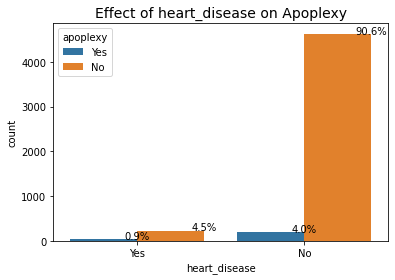

In [ ]:
#Checking whether Heart disease effects apoplexy
print('Heart disease\n',dataset['heart_disease'].value_counts())

Count_plot('heart_disease')
#From Plot we can say persons with heart_disease has high chance for getting Apoplexy.

#### Ever_Marrried

Marriage status
 Yes    3353
No     1756
Name: ever_married, dtype: int64


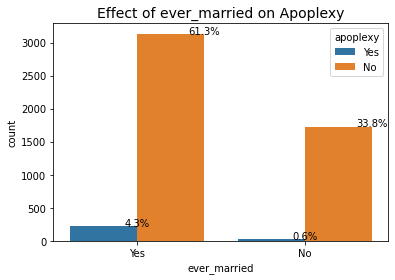

In [ ]:
#Checking whether Ever_married effects apoplexy
print('Marriage status\n',dataset['ever_married'].value_counts())

Count_plot('ever_married')
#From plot we can say married persons may have chance of getting apoplexy.

#### Work_type

Work_types
 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


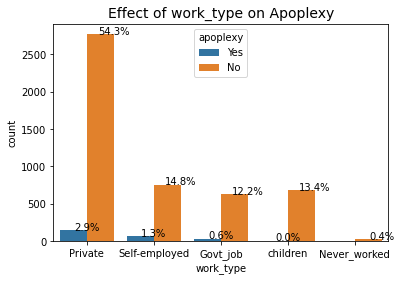

In [ ]:
#Checking whether Work_type effects apoplexy
print('Work_types\n',dataset['work_type'].value_counts())
Count_plot('work_type')
#From plot we can say people who working as private and self-employed has most likely to get apoplexy than never worked.

#### Residence_type

Residence_types
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


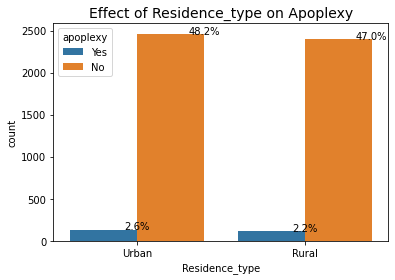

In [ ]:
#Checking whether Residence_type effects apoplexy
print('Residence_types\n',dataset['Residence_type'].value_counts())

Count_plot('Residence_type')
#from plot we can say there is not much difference for both Residence_types..

#### Avg_glucose_level

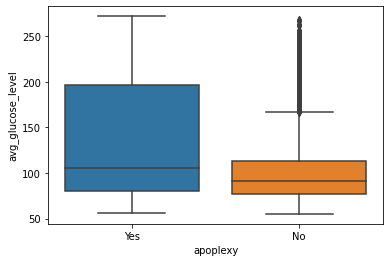

In [ ]:
#Checking whether avg_glucose_level effects apoplexy
sns.boxplot(data=dataset, x='apoplexy', y='avg_glucose_level')

#From plot we can say persons having avg_glucose_level greater then 100 has higher chance of getting apoplexy.
#But with higher glucose levels morethan 170 persons have no apoplexy.

#### BMI

No of missing values(BMI): 201


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.60000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.89456,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.50000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.40000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.00000,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.00000,formerly smoked,Yes
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.40000,never smoked,Yes
7,Female,69.0,No,No,No,Private,Urban,94.39,22.80000,never smoked,Yes
8,Female,59.0,No,No,Yes,Private,Rural,76.15,28.89456,Unknown,Yes
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.20000,Unknown,Yes


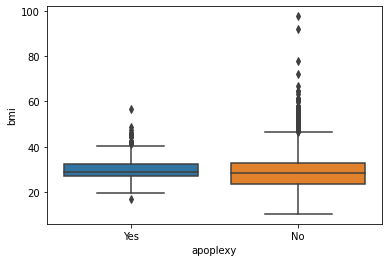

In [ ]:
#For BMI we have some missing values.
print('No of missing values(BMI):',dataset['bmi'].isna().sum())

#Around 201 rows are missing for BMI.
#Deletion of rows may effects the prediction. Hence replacing them with mean.

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['bmi']])
dataset[['bmi']]=imputer.transform(dataset[['bmi']])
#Checking whether BMI effects apoplexy
sns.boxplot(data=dataset,x='apoplexy',y='bmi')

#from plot we can't predict how BMI has impact on apoplexy.
dataset.head(10)

#### Smoking_status

Smoking status
 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


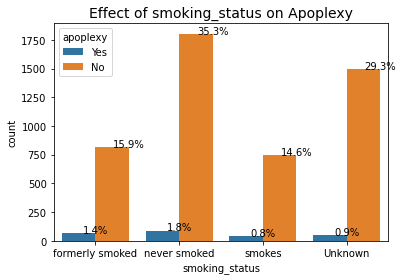

In [ ]:
# Checking whether smoking_status effects apoplexy
print('Smoking status\n',dataset['smoking_status'].value_counts())

Count_plot('smoking_status')

#If we replace unknown data with mode it may effect the model performance. So, just keeping missing data as Unknown column.
#Since we have unbalanced data. From plot, we can't predict whether smoking is the factor for apoplexy. 
#But as per our basic knowledge it may have some effect on apoplexy(medical perspective)

#### Apoplexy

Apoplexy
 No     4860
Yes     249
Name: apoplexy, dtype: int64


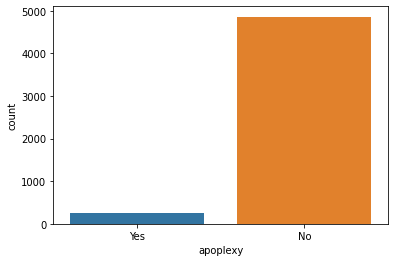

In [ ]:
print('Apoplexy\n',dataset['apoplexy'].value_counts())
sns.countplot(data=dataset,x='apoplexy')

## 4. Encoding Categorical Data

In [ ]:
#Using LabelEncoding technique to encode categorical variables to numerical data.

le = LabelEncoder()
dataset['gender'] = le.fit_transform(dataset['gender'])
dataset['hypertension'] = le.fit_transform(dataset['hypertension'])
dataset['heart_disease']=le.fit_transform(dataset['heart_disease'])
dataset['ever_married'] = le.fit_transform(dataset['ever_married'])
dataset['work_type'] = le.fit_transform(dataset['work_type'])
dataset['Residence_type'] = le.fit_transform(dataset['Residence_type'])
dataset['smoking_status'] = le.fit_transform(dataset['smoking_status'])

dataset['apoplexy']=le.fit_transform(dataset['apoplexy'])

dataset.head(5)
dataset1=dataset

#### Checking for Correlation between parameters.

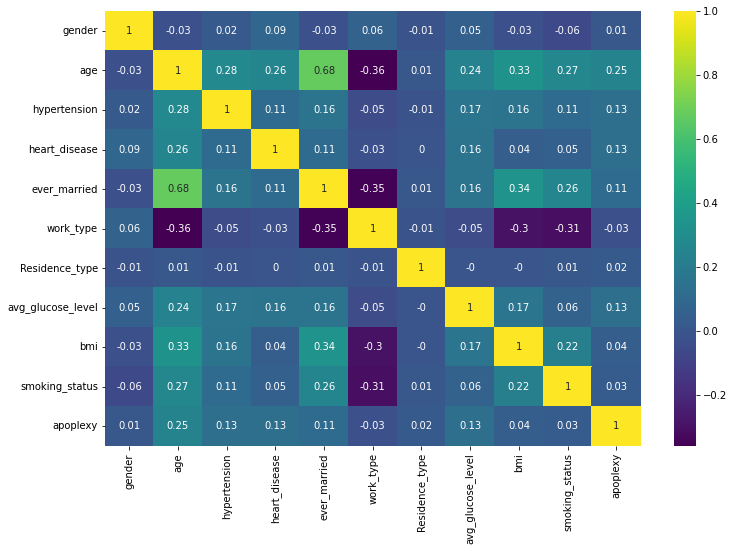

In [ ]:
#Visualizing dataset through heatmap plot
dst = dataset.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(dst, cmap="viridis",annot = True)

#From heatmap we can say age, hypertension, heart_disease, ever_married, avg_glucose_level has most correlation.

In [ ]:
#We want to confirm the effective correlation between parameters. So, using SelectKBest and F_Classif.
#Since some of the parameters has less effectiveness on Apoplexy,
#So we are confirming parameters with high correlation with Apoplexy.

corr = SelectKBest(score_func=f_classif,k=5)
dst = corr.fit(dataset.drop('apoplexy',axis=1),dataset['apoplexy'])
df = pd.DataFrame(dst.scores_)
dfc = pd.DataFrame(dataset.drop('apoplexy',axis=1).columns)
scores = pd.concat([dfc,df],axis=1)
scores.columns = ['Attribute','Score']
scores.sort_values(by='Score',ascending=False)

#we just confirmed that age, heart_disease, avg_glucose_level, hypertension, ever_married has highest correlation. 
#So, we are considering these Columns for training.

,Attribute,Score
1,age,326.799849
3,heart_disease,94.666779
7,avg_glucose_level,90.550026
2,hypertension,84.919947
4,ever_married,60.609558
8,bmi,7.746392
5,work_type,5.341306
9,smoking_status,4.037898
6,Residence_type,1.213760
0,gender,0.421144


In [ ]:
#We are considering columns with Score greater then 60.
cols=scores[scores['Score']>60]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


## 5. Splitting of dataset into Train set and Test set

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataset[cols],dataset['apoplexy'],test_size=0.2,random_state=1255)

In [ ]:
X_train,y_train

(       age  hypertension  heart_disease  ever_married  avg_glucose_level
 4734  78.0             0              0             1              67.90
 3481  57.0             0              0             0              87.18
 207   78.0             0              0             0              90.19
 2524  81.0             0              0             1             165.47
 143   69.0             1              1             0              72.17
 ...    ...           ...            ...           ...                ...
 3589  30.0             0              0             1              96.02
 3820  61.0             0              0             1             114.09
 4696  63.0             1              0             1             232.78
 2001  25.0             0              0             1              97.52
 1765   5.0             0              0             0              70.00
 
 [4087 rows x 5 columns], 4734    0
 3481    0
 207     1
 2524    0
 143     1
        ..
 3589    0
 3820   

In [ ]:
X_test,y_test

(       age  hypertension  heart_disease  ever_married  avg_glucose_level
 1546  71.0             1              0             1              93.60
 1814  50.0             0              0             1              88.24
 3327  74.0             0              0             0             204.77
 4498  62.0             0              0             1             128.61
 1652  70.0             0              0             1              66.85
 ...    ...           ...            ...           ...                ...
 1047   5.0             0              0             0              84.93
 1792  24.0             0              0             0              72.06
 2620  14.0             0              0             0              92.22
 1089  45.0             0              0             0             153.76
 646   70.0             0              0             0              98.42
 
 [1022 rows x 5 columns], 1546    0
 1814    0
 3327    0
 4498    0
 1652    0
        ..
 1047    0
 1792   

## 6. Feature Scaling
Variables that are measured at different scales do not contribute equally to model fitting and might end up creating a bias. So, scaling the features to reducing bias and to improve performance of the model.

In [ ]:
#Using StandardScalar for feature scaling.
#We only have two columns need to be scaled(age,avg_glucose_level)

sc=StandardScaler()
X_train[['avg_glucose_level','age']]=sc.fit_transform(X_train[['avg_glucose_level','age']])
X_test[['avg_glucose_level','age']]=sc.transform(X_test[['avg_glucose_level','age']])

In [ ]:
X_train, X_test

(           age  hypertension  heart_disease  ever_married  avg_glucose_level
 4734  1.532243             0              0             1          -0.848235
 3481  0.604925             0              0             0          -0.422458
 207   1.532243             0              0             0          -0.355985
 2524  1.664717             0              0             1           1.306491
 143   1.134821             1              1             0          -0.753937
 ...        ...           ...            ...           ...                ...
 3589 -0.587341             0              0             1          -0.227236
 3820  0.781557             0              0             1           0.171820
 4696  0.869873             1              0             1           2.792959
 2001 -0.808131             0              0             1          -0.194110
 1765 -1.691291             0              0             0          -0.801859
 
 [4087 rows x 5 columns],
            age  hypertension  heart

In [ ]:
#Since dataset is imbalanced we are using SMOTE method to balance the dataset.
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)
X_test,y_test = smote.fit_resample(X_test,y_test)

## 7.Training model using XGBClassifier

In [ ]:
#We are using XGBClassifier method to train the model.
#Since we got better performance comparing to other classification models.

xgc = XGBClassifier(n_estimators=50000,max_depth=5,learning_rate=0.001,n_jobs=-1, use_label_encoder =False)
xgc.fit(X_train,y_train)
predict = xgc.predict(X_test)

## 8.Performance Evaluation

#### Accuracy, F1 Score, Classification Report, ROC-AUC Score

In [ ]:
#Getting the Accuracy, f1_score and classification report of the model.
print('Accuracy --> ',accuracy_score(y_test,predict))
print('F1 Score --> ',f1_score(y_test,predict))
print('Classification Report  --> \n',classification_report(y_test,predict))
print(pd.crosstab(y_test,predict))

#ROC-AUC score
auc_score = roc_auc_score(y_test, predict)
print('ROC-AUC Score:',auc_score)

Accuracy -->  0.9146090534979424
F1 Score -->  0.9105603448275863
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       972
           1       0.96      0.87      0.91       972

    accuracy                           0.91      1944
   macro avg       0.92      0.91      0.91      1944
weighted avg       0.92      0.91      0.91      1944

col_0       0    1
apoplexy          
0         933   39
1         127  845
ROC-AUC Score: 0.9146090534979424


### Training other Classification models for performance evaluation

In [ ]:
#Logistic Regression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
predict1 = classifier.predict_proba(X_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)
predict2=knn.predict_proba(X_test)

#SVM
svm=SVC(kernel='rbf',random_state=0,probability=True)
svm.fit(X_train,y_train)
predict3=svm.predict_proba(X_test)

#Naive bayes
naiveb=GaussianNB()
naiveb.fit(X_train,y_train)
predict4=naiveb.predict_proba(X_test)

#Decision tree classifier
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree.fit(X_train,y_train)
predict5=dtree.predict_proba(X_test)

#Random forest
rforest=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
rforest.fit(X_train,y_train)
predict6=rforest.predict_proba(X_test)

#XGBClassifier
prob_x=xgc.predict_proba(X_test)

In [ ]:
#Loading parameters for building ROC curve
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, predict1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, prob_x[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predict2[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predict3[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, predict4[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, predict5[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, predict6[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

### ROC Curve

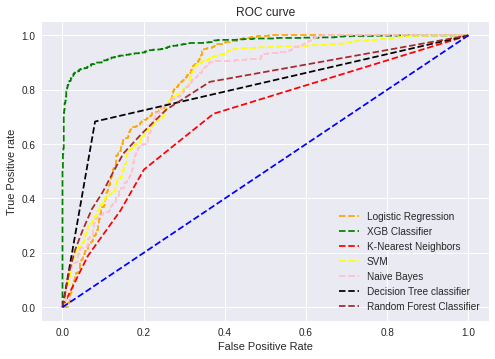

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGB Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='K-Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Naive Bayes')
plt.plot(fpr6, tpr6, linestyle='--',color='black', label='Decision Tree classifier')
plt.plot(fpr7, tpr7, linestyle='--',color='brown', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
#plt.savefig('ROC',dpi=10)
plt.show();

### Conclusion
From the above AUC_ROC curve we can say that XGBClassifier was effective method for predicting the chance of getting Apoplexy.